# !!!!!このファイルは別の場所で実行できません。ご注意ください!!!!!


In [1]:
if "xxx" in globals():
    pass
else:
    import os,glob
    currentdir = os.getcwd()
xxx = True
os.chdir(currentdir)
os.chdir("../")
print("maindir=",os.getcwd())

from create_database import detail2d,d2m,get_annual_return_distribution

maindir= /home/tajimamainpc/repos/asset_simulator


# macrotrendsのサイトから追加したい銘柄を持ってくる
- marotrendsサイト
    https://www.macrotrends.net/  
- macrotrends_xxxに保存
    - macrotrends_detail
    - macrotrends_d
    - macrotrends_m
- 保存ファイルの名前を下記のnamesに記載して実行
- モンテカルロ法を用い年間利回り分布がdatabaseに保存される

# detailをdayの形式に変換して保存

In [3]:
maindir = os.getcwd()
input_path = f"{maindir}/macrotrends_detail"
output_path = f"{maindir}/macrotrends_d"

names = [os.path.basename(name).split(".")[0] for name in glob.glob(f"{input_path}/*.csv")]
# names = ["TSLA", "NVDA"]
for name in names:
    print(name)
    detail2d(input_path, output_path, name)

NVDA
TSLA


# 日足データを月足に変換する
日足の同じ月のデータは月が変わった日の値を取り出す。

In [4]:
input_path = "macrotrends_d"
output_path = "macrotrends_m"
names = [os.path.basename(name).split(".")[0] for name in glob.glob(f"{input_path}/*.csv")]
# names = ["Nikkei225"]
for name in names:
    print(name)
    d2m(input_path, output_path, name)

DAX30INDEX
NVDA
TSLA
Nikkei225
Shanghai_Composite_Index


# 月足から年足の利回り分布を計算

Processing DAX30INDEX...


  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:00<00:00, 118943.82it/s]


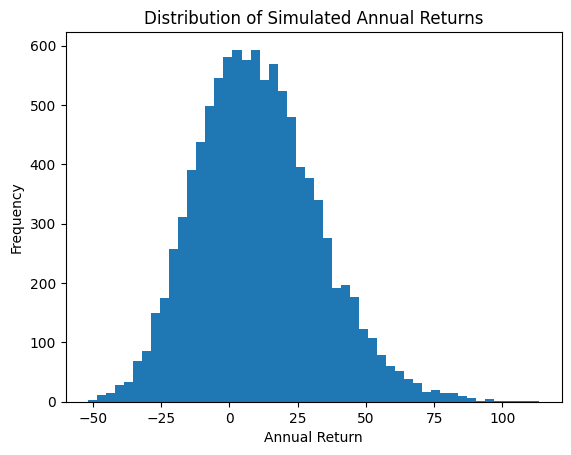

Processing SP500...


100%|██████████| 10000/10000 [00:00<00:00, 65889.64it/s]


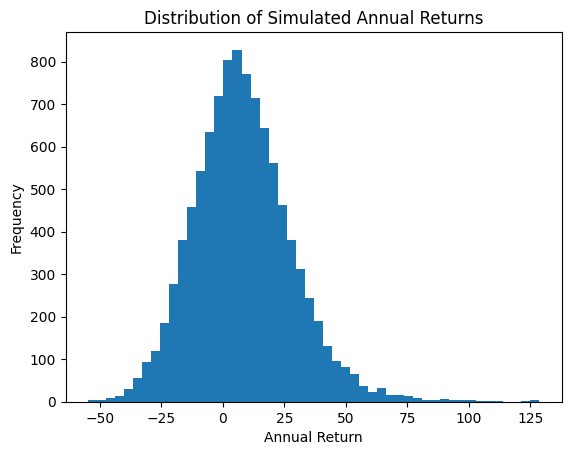

Processing NVDA...


100%|██████████| 10000/10000 [00:00<00:00, 124901.10it/s]


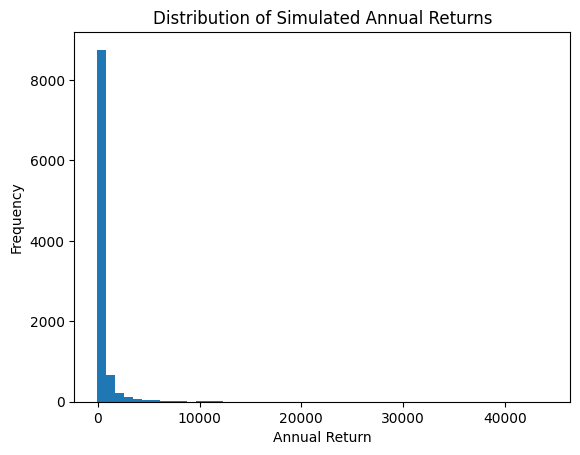

Processing TSLA...


100%|██████████| 10000/10000 [00:00<00:00, 58530.70it/s]


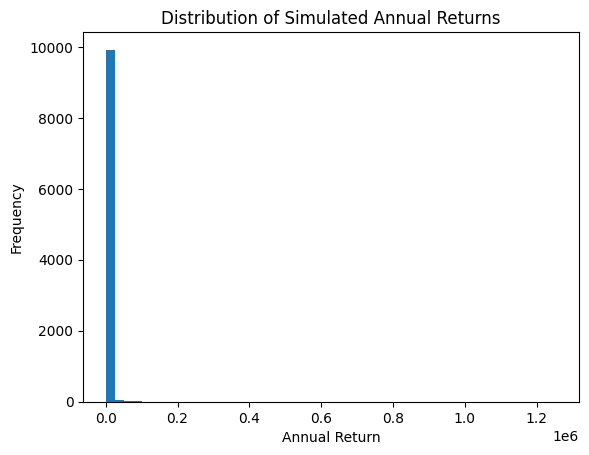

Processing Nikkei225...


100%|██████████| 10000/10000 [00:00<00:00, 107681.83it/s]


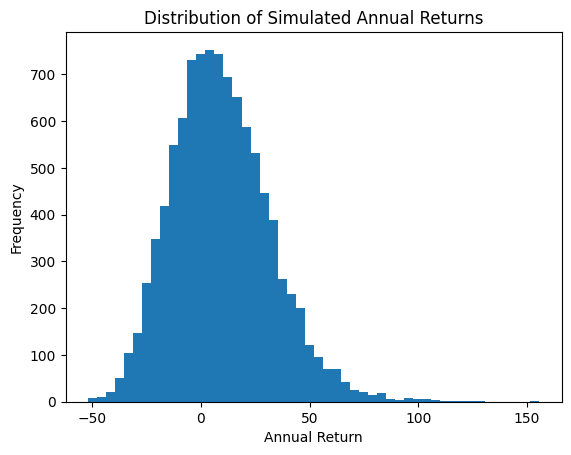

Processing NASDAQ...


100%|██████████| 10000/10000 [00:00<00:00, 118222.01it/s]


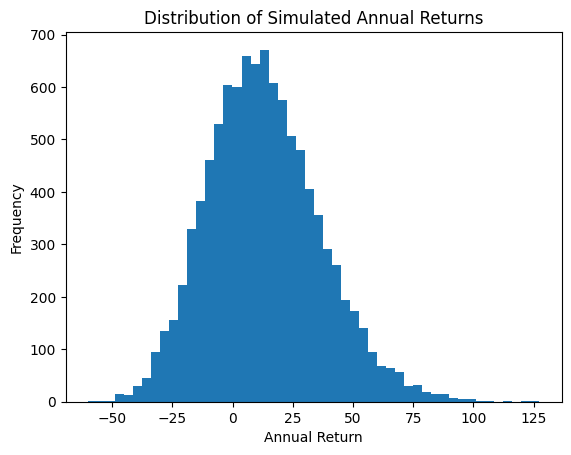

Processing Shanghai_Composite_Index...


100%|██████████| 10000/10000 [00:00<00:00, 106049.06it/s]


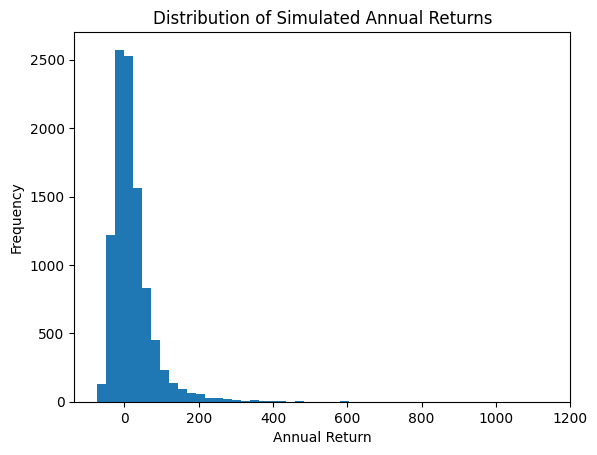

Processing DowJones...


100%|██████████| 10000/10000 [00:00<00:00, 74007.68it/s]


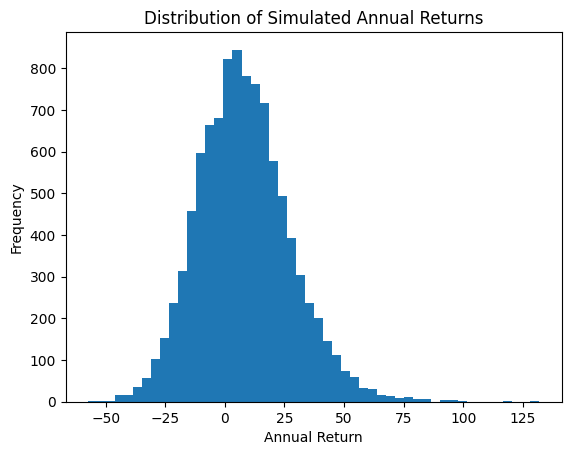

In [7]:
input_path = glob.glob(f"macrotrends_m")[0]
output_path = glob.glob(f"database")[0]
names = [os.path.basename(name).split(".")[0] for name in glob.glob(f"{input_path}/*.csv")]
# names = ["SP500", "NASDAQ", "DowJones", "Nikkei225"]
# names = ["Nikkei225"]
bins = 50
for name in names:
    print(f"Processing {name}...")
    get_annual_return_distribution(input_path,
                                    output_path,
                                    name,
                                    bins,
                                    monthly_histogram=False,
                                    annual_histogram=True)

# 最後に
資産シミュレーションは長期運用時の資産推移を概算するものであるため、十分に長期なデータを含む商品である必要がある点に注意